#  Del 06: Strojno učenje: Logistična regresija

## Logistic regression

### Classification

### Introduction to the data

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
admissions = pd.read_csv("data/admissions.csv")

In [33]:
admissions.head()

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


In [34]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   644 non-null    int64  
 1   gpa     644 non-null    float64
 2   gre     644 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.2 KB


In [35]:
admissions.describe()

,admit,gpa,gre
count,644.000000,644.000000,644.000000
mean,0.378882,3.239936,612.923057
std,0.485486,0.291907,76.637990
min,0.000000,2.177100,390.363563
25%,0.000000,3.045036,560.596793
50%,0.000000,3.234650,612.104848
75%,1.000000,3.448415,663.094697
max,1.000000,4.000000,800.000000


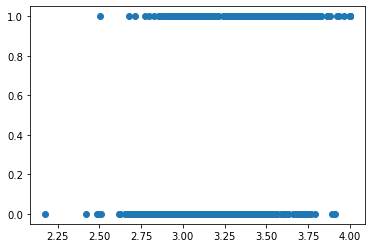

In [6]:

plt.scatter(admissions['gpa'], admissions['admit'])
plt.show()

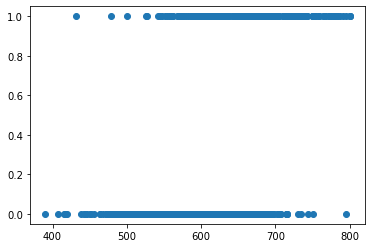

In [7]:
plt.scatter(admissions['gre'], admissions['admit'])
plt.show()

### Logistic regression

###  Logistic function

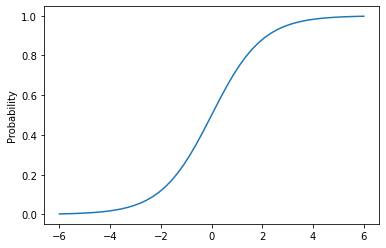

In [8]:
import numpy as np

# Logistic Function
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logistic function.
y = logistic(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

### Training a logistic regression model

In [9]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_reg = LogisticRegression()
X = admissions[['gpa']]
y = admissions['admit']

log_reg.fit(X,y)

LogisticRegression()

### Plotting probabilities

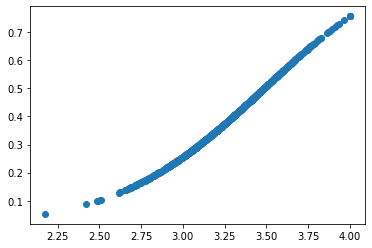

In [37]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

pred_probs = logistic_model.predict_proba(admissions[["gpa"]])

plt.scatter(admissions["gpa"], pred_probs[:,1])
plt.show()

### Predict labels

In [12]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

fitted_labels = logistic_model.predict(admissions[["gpa"]])

fitted_labels



array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

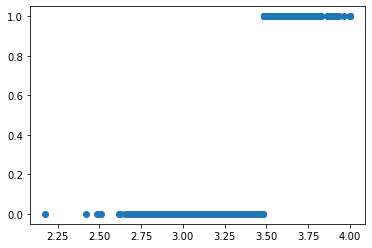

In [13]:
plt.scatter(admissions["gpa"], fitted_labels)
plt.show()

## Introduction to evaluating binary classifiers

### Introduction to the Data

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [39]:
admissions = pd.read_csv("data/admissions.csv")
model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])

LogisticRegression()

In [16]:
labels = model.predict(admissions[['gpa']])

In [17]:
admissions['predicted_labels'] = labels

In [18]:
admissions.head()

,admit,gpa,gre,predicted_labels
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
2,0,2.728097,553.714399,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0


In [19]:
admissions['predicted_labels'].value_counts()

0    507
1    137
Name: predicted_labels, dtype: int64

### Accuracy

In [44]:
admissions = pd.read_csv("data/admissions.csv")
model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])
labels = model.predict(admissions[["gpa"]])
admissions['predicted_label'] = labels
admissions["actual_label"] = admissions["admit"]

In [45]:
admissions['actual_label'] = admissions['admit']

In [46]:
matches = admissions['predicted_label'] == admissions['actual_label']

In [47]:
correct_predictions = admissions[matches]

In [48]:
accur = len(correct_predictions)/len(admissions)

In [49]:
accur*100

68.47826086956522

In [50]:
admissions = pd.read_csv("data/admissions.csv")
model = LogisticRegression()

X = admissions[['gpa']]
y = admissions['admit']

model.fit(X,y)
model.score(X,y)

0.6847826086956522

### Binary classification outcomes

In [51]:
admissions = pd.read_csv("data/admissions.csv")
model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])
labels = model.predict(admissions[["gpa"]])
admissions['predicted_label'] = labels
admissions["actual_label"] = admissions["admit"]

In [52]:
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])

In [53]:
print(true_positives)

89


In [54]:
true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])

In [55]:
print(true_negatives)

352


### Sensitivity

In [56]:
# From the previous screen
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])

false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negative_filter])

In [57]:
sensitivity = true_positives / (true_positives + false_negatives)

print(sensitivity)

0.36475409836065575


###  Specificity

In [58]:
true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])

false_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 0)
false_positives = len(admissions[false_positive_filter])

In [59]:
specificity = (true_negatives) / (false_positives + true_negatives)
print(specificity)

0.88


### Vaja - uporaba vseh značilk

In [60]:
admissions = pd.read_csv("data/admissions.csv")

In [61]:
X = admissions[['gpa', 'gre']]
y = admissions['admit']

In [62]:
admitted = admissions.loc[y == 1]
not_admitted = admissions.loc[y == 0]

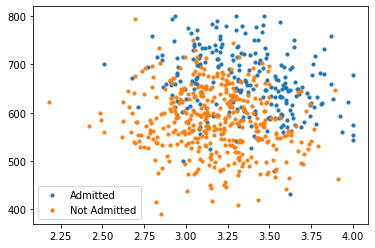

In [63]:
# prikaz podatkov
plt.scatter(admitted.loc[:, "gpa"], admitted.loc[:, "gre"], s=10, label='Admitted')
plt.scatter(not_admitted.loc[:, "gpa"], not_admitted.loc[:, "gre"], s=10, label='Not Admitted')
plt.legend()
plt.show()

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [66]:
model = LogisticRegression()

In [67]:
model.fit(X_train, y_train)

LogisticRegression()

In [68]:
model.score(X_test, y_test)

0.7639751552795031

In [69]:
b = model.intercept_[0]
w1, w2 = model.coef_.T
c = -b/w2
m = -w1/w2

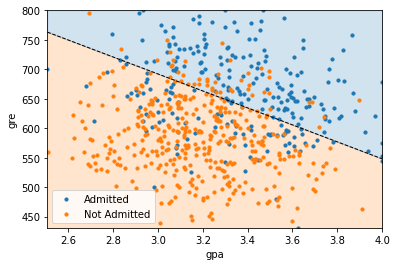

In [70]:
xmin, xmax = admitted['gpa'].min(), admitted['gpa'].max()
ymin, ymax = admitted['gre'].min(), admitted['gre'].max()
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:orange', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:blue', alpha=0.2)

plt.scatter(admitted.loc[:, "gpa"], admitted.loc[:, "gre"], s=10, label='Admitted')
plt.scatter(not_admitted.loc[:, "gpa"], not_admitted.loc[:, "gre"], s=10, label='Not Admitted')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'gre')
plt.xlabel(r'gpa')
plt.legend()
plt.show()

## Multiclass classification

### Introduction to the data

In [71]:
import pandas as pd
cars = pd.read_csv("data/auto.csv")

In [72]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
#origin 1 - Amerika, 2 - Evropa, 3 - Azija

In [74]:
unique_regions = cars['origin'].unique()

### Dummy variables

In [76]:
dummy_cylinders = pd.get_dummies(cars['cylinders'], prefix = 'cyl')

In [77]:
dummy_cylinders

,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
387,0,1,0,0,0
388,0,1,0,0,0
389,0,1,0,0,0
390,0,1,0,0,0


In [78]:
cars = pd.concat([cars, dummy_cylinders], axis = 1)
cars = cars.drop('cylinders', axis = 1)

In [79]:
cars

,mpg,displacement,horsepower,weight,acceleration,year,origin,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8
0,18.0,307.0,130.0,3504.0,12.0,70,1,0,0,0,0,1
1,15.0,350.0,165.0,3693.0,11.5,70,1,0,0,0,0,1
2,18.0,318.0,150.0,3436.0,11.0,70,1,0,0,0,0,1
3,16.0,304.0,150.0,3433.0,12.0,70,1,0,0,0,0,1
4,17.0,302.0,140.0,3449.0,10.5,70,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,140.0,86.0,2790.0,15.6,82,1,0,1,0,0,0
388,44.0,97.0,52.0,2130.0,24.6,82,2,0,1,0,0,0
389,32.0,135.0,84.0,2295.0,11.6,82,1,0,1,0,0,0
390,28.0,120.0,79.0,2625.0,18.6,82,1,0,1,0,0,0


In [81]:
dummy_years = pd.get_dummies(cars['year'], prefix = 'year')
cars = pd.concat([cars, dummy_years], axis = 1)
cars = cars.drop('year', axis = 1)
cars.head()

,mpg,displacement,horsepower,weight,acceleration,origin,cyl_3,cyl_4,cyl_5,cyl_6,...,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
0,18.0,307.0,130.0,3504.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165.0,3693.0,11.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150.0,3436.0,11.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150.0,3433.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140.0,3449.0,10.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Multiclass classification

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
features = cars.drop('origin', axis = 1).columns
features = [c for c in features if c.startswith('cyl') or c.startswith('year')]


In [102]:
X = cars[features]
y = cars['origin']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

### Training a multiclass logistic regression model

In [131]:
from sklearn.linear_model import LogisticRegression

unique_origins = cars["origin"].unique()
unique_origins.sort()
unique_origins

array([1, 2, 3])

In [132]:
unique_origins

array([1, 2, 3])

In [133]:
models = {}

for origin in unique_origins:
    model = LogisticRegression()
    
    y_train_tmp = y_train == origin
    
    model.fit(X_train, y_train_tmp)
    models[origin] = model

### Testing the models

In [134]:
testing_probs = pd.DataFrame(columns = unique_origins)

In [135]:
for origin in unique_origins:
    testing_probs[origin] = models[origin].predict_proba(X_test)[:,1]

In [136]:
testing_probs.head()

,1,2,3
0,0.628997,0.139524,0.237968
1,0.835445,0.094484,0.067062
2,0.878563,0.075318,0.057063
3,0.449296,0.336109,0.203251
4,0.319766,0.208975,0.465357


### Choose the origin

In [137]:
predicted_origins = testing_probs.idxmax(axis = 1)

In [138]:
predicted_origins

0     1
1     1
2     1
3     1
4     3
     ..
93    3
94    1
95    1
96    1
97    1
Length: 98, dtype: int64

In [139]:
y_test

0     3
1     1
2     1
3     3
4     3
     ..
93    3
94    1
95    1
96    1
97    1
Name: origin, Length: 98, dtype: int64

In [140]:
y_test = y_test.reset_index(drop = True)
matches = y_test == predicted_origins

In [141]:
correct_predictions = y_test[matches]

In [142]:
accur = len(correct_predictions) / len(y_test)
accur

0.6326530612244898